In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
kidney_df = pd.read_csv("D:/Multiple Disease Prediction/kidney_disease - kidney_disease.csv")
kidney_df

NameError: name 'pd' is not defined

In [ ]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
#Handling null values  
kidney_df.isnull().sum()/len(kidney_df)

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

<Axes: >

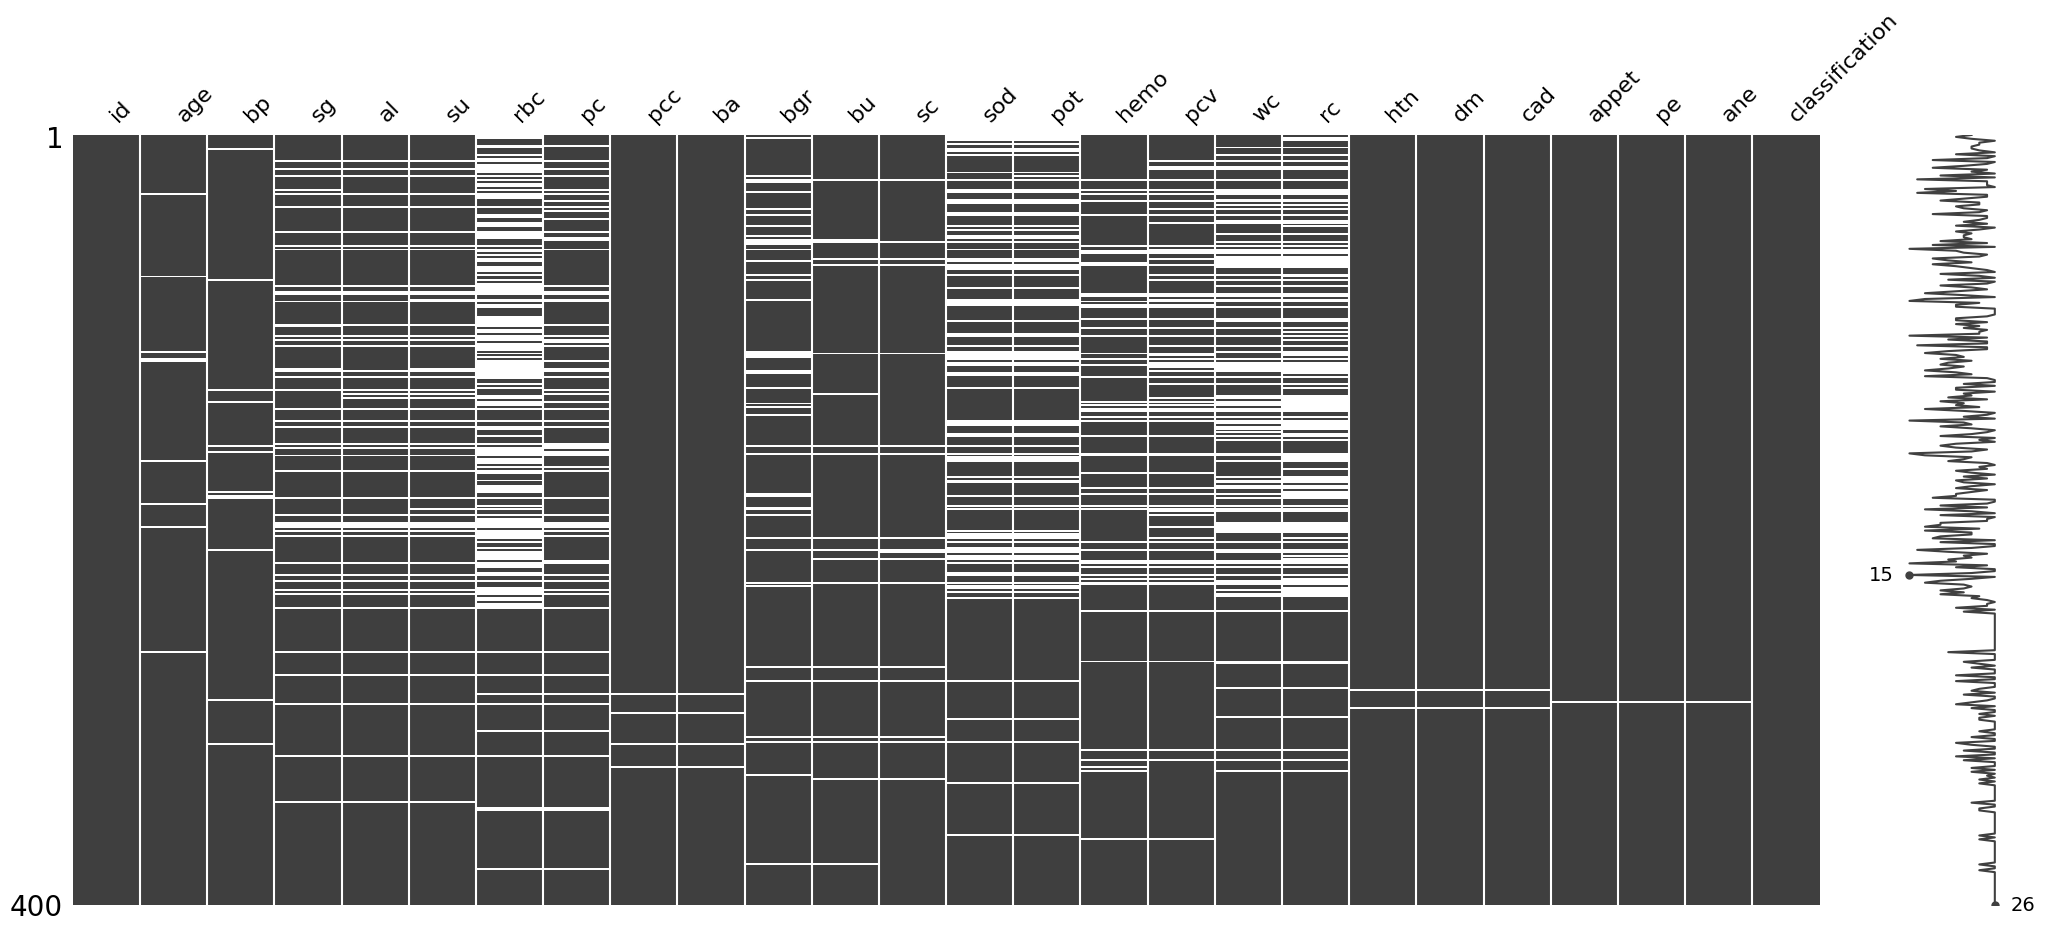

In [ ]:
import missingno as msno
msno.matrix(kidney_df)

<Axes: >

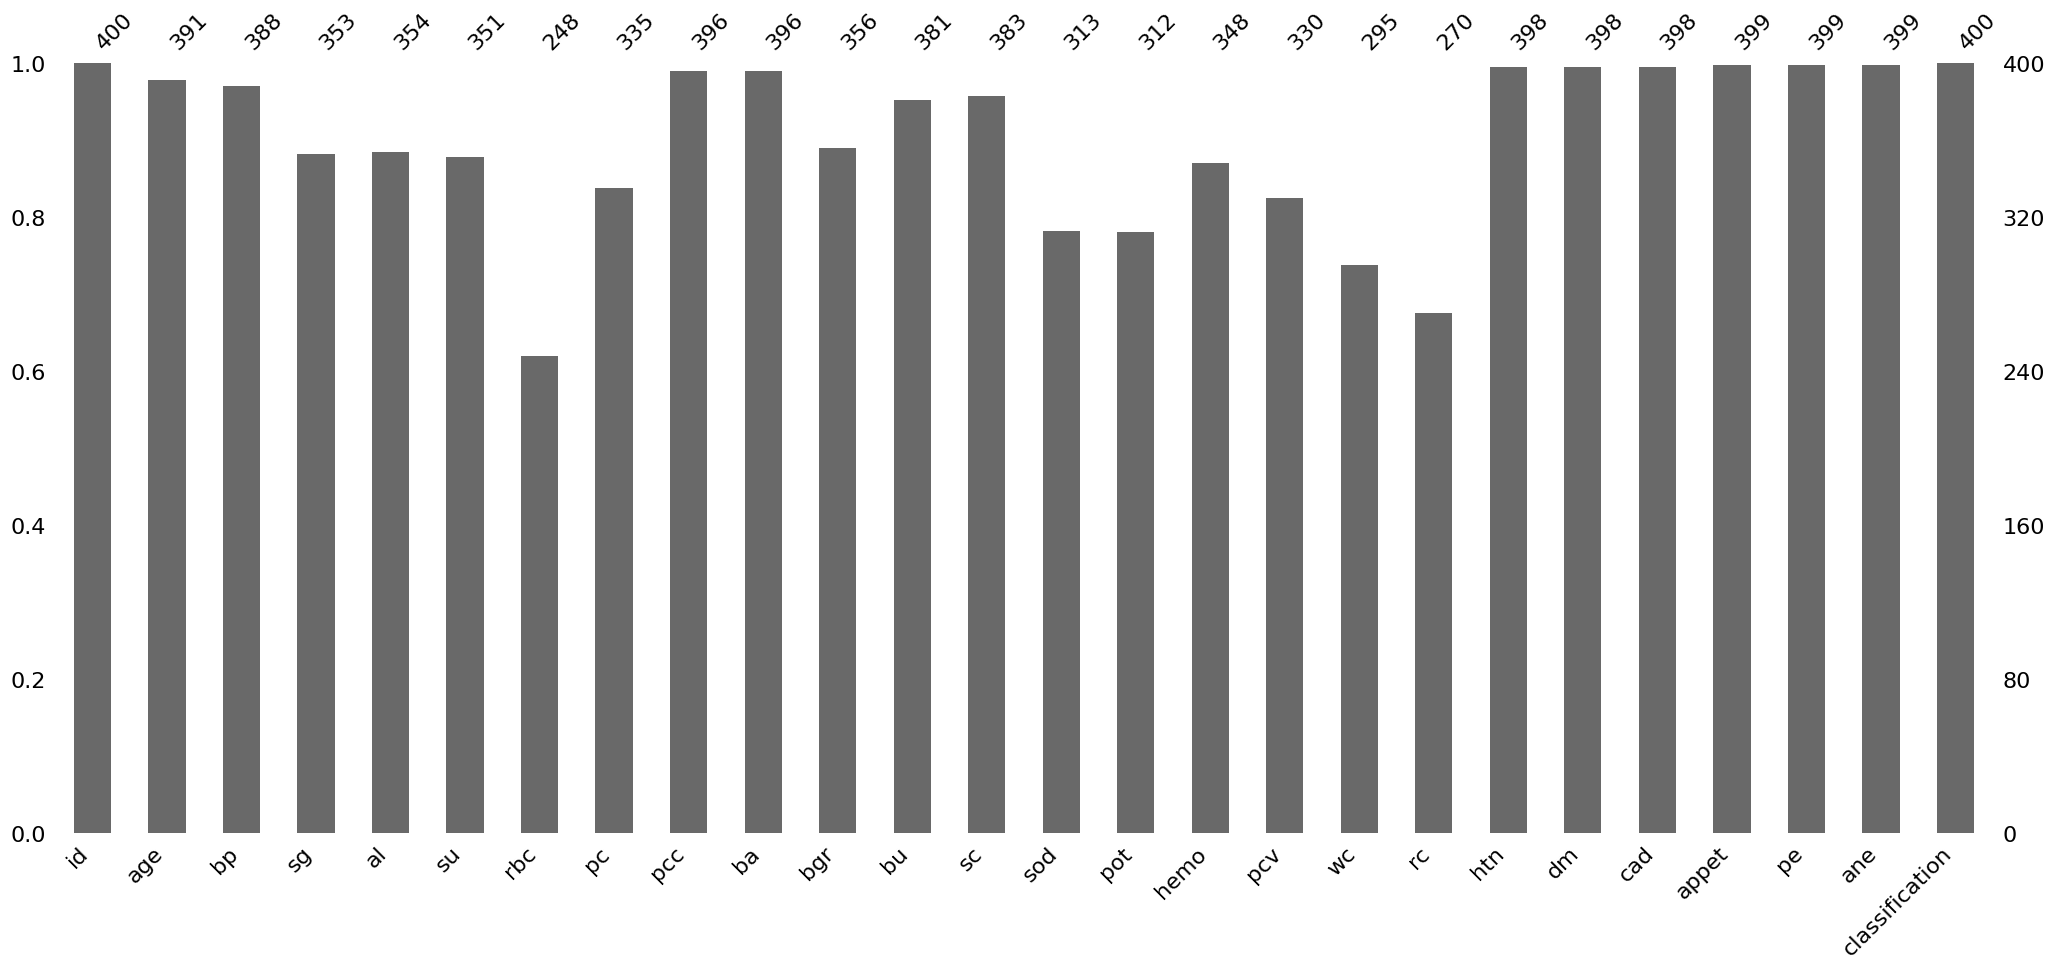

In [ ]:
msno.bar(kidney_df)

Text(0.5, 1.0, 'counts for kidney Disease(Classification Target)')

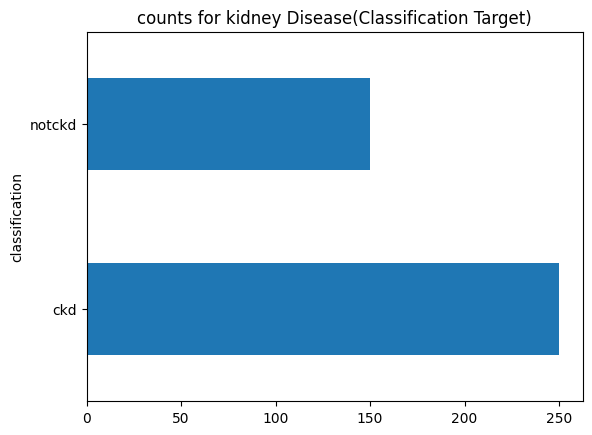

In [ ]:

kidney_df['classification'].value_counts().plot(kind='barh').set_title('counts for kidney Disease(Classification Target)')

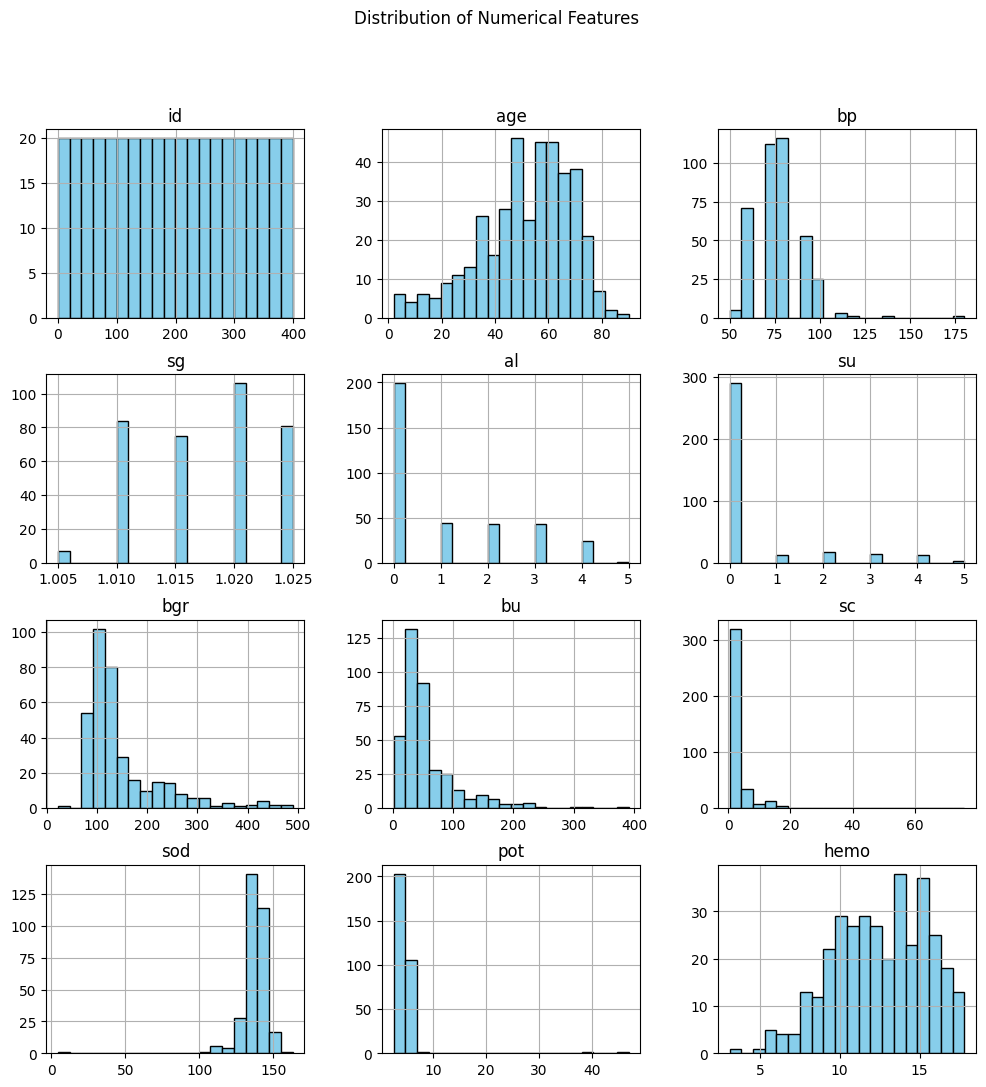

In [ ]:
num_cols = kidney_df.select_dtypes(include=['int64','float64']).columns
kidney_df[num_cols].hist(figsize=(12, 12), bins=20, color='skyblue', edgecolor='black')  
plt.suptitle("Distribution of Numerical Features") 
plt.show()  

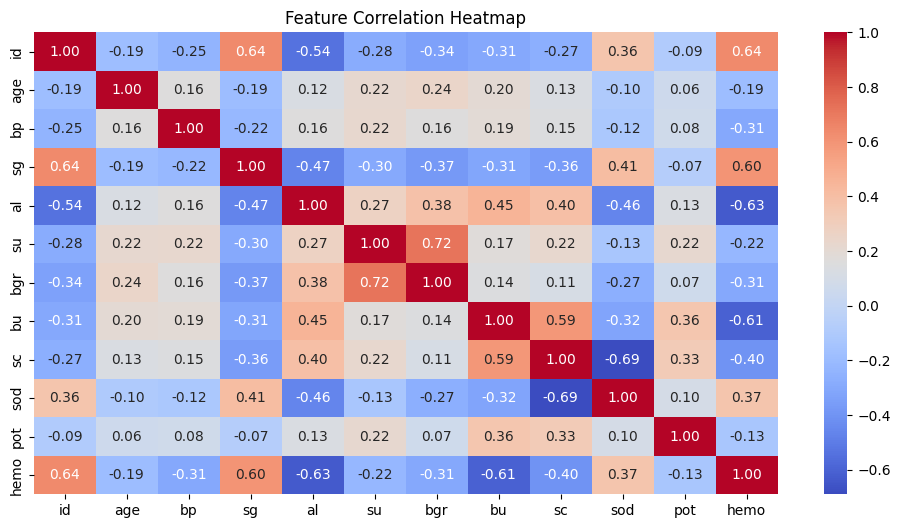

In [ ]:
#Heatmap to find correlation Between values
corr_matrix = kidney_df.corr(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

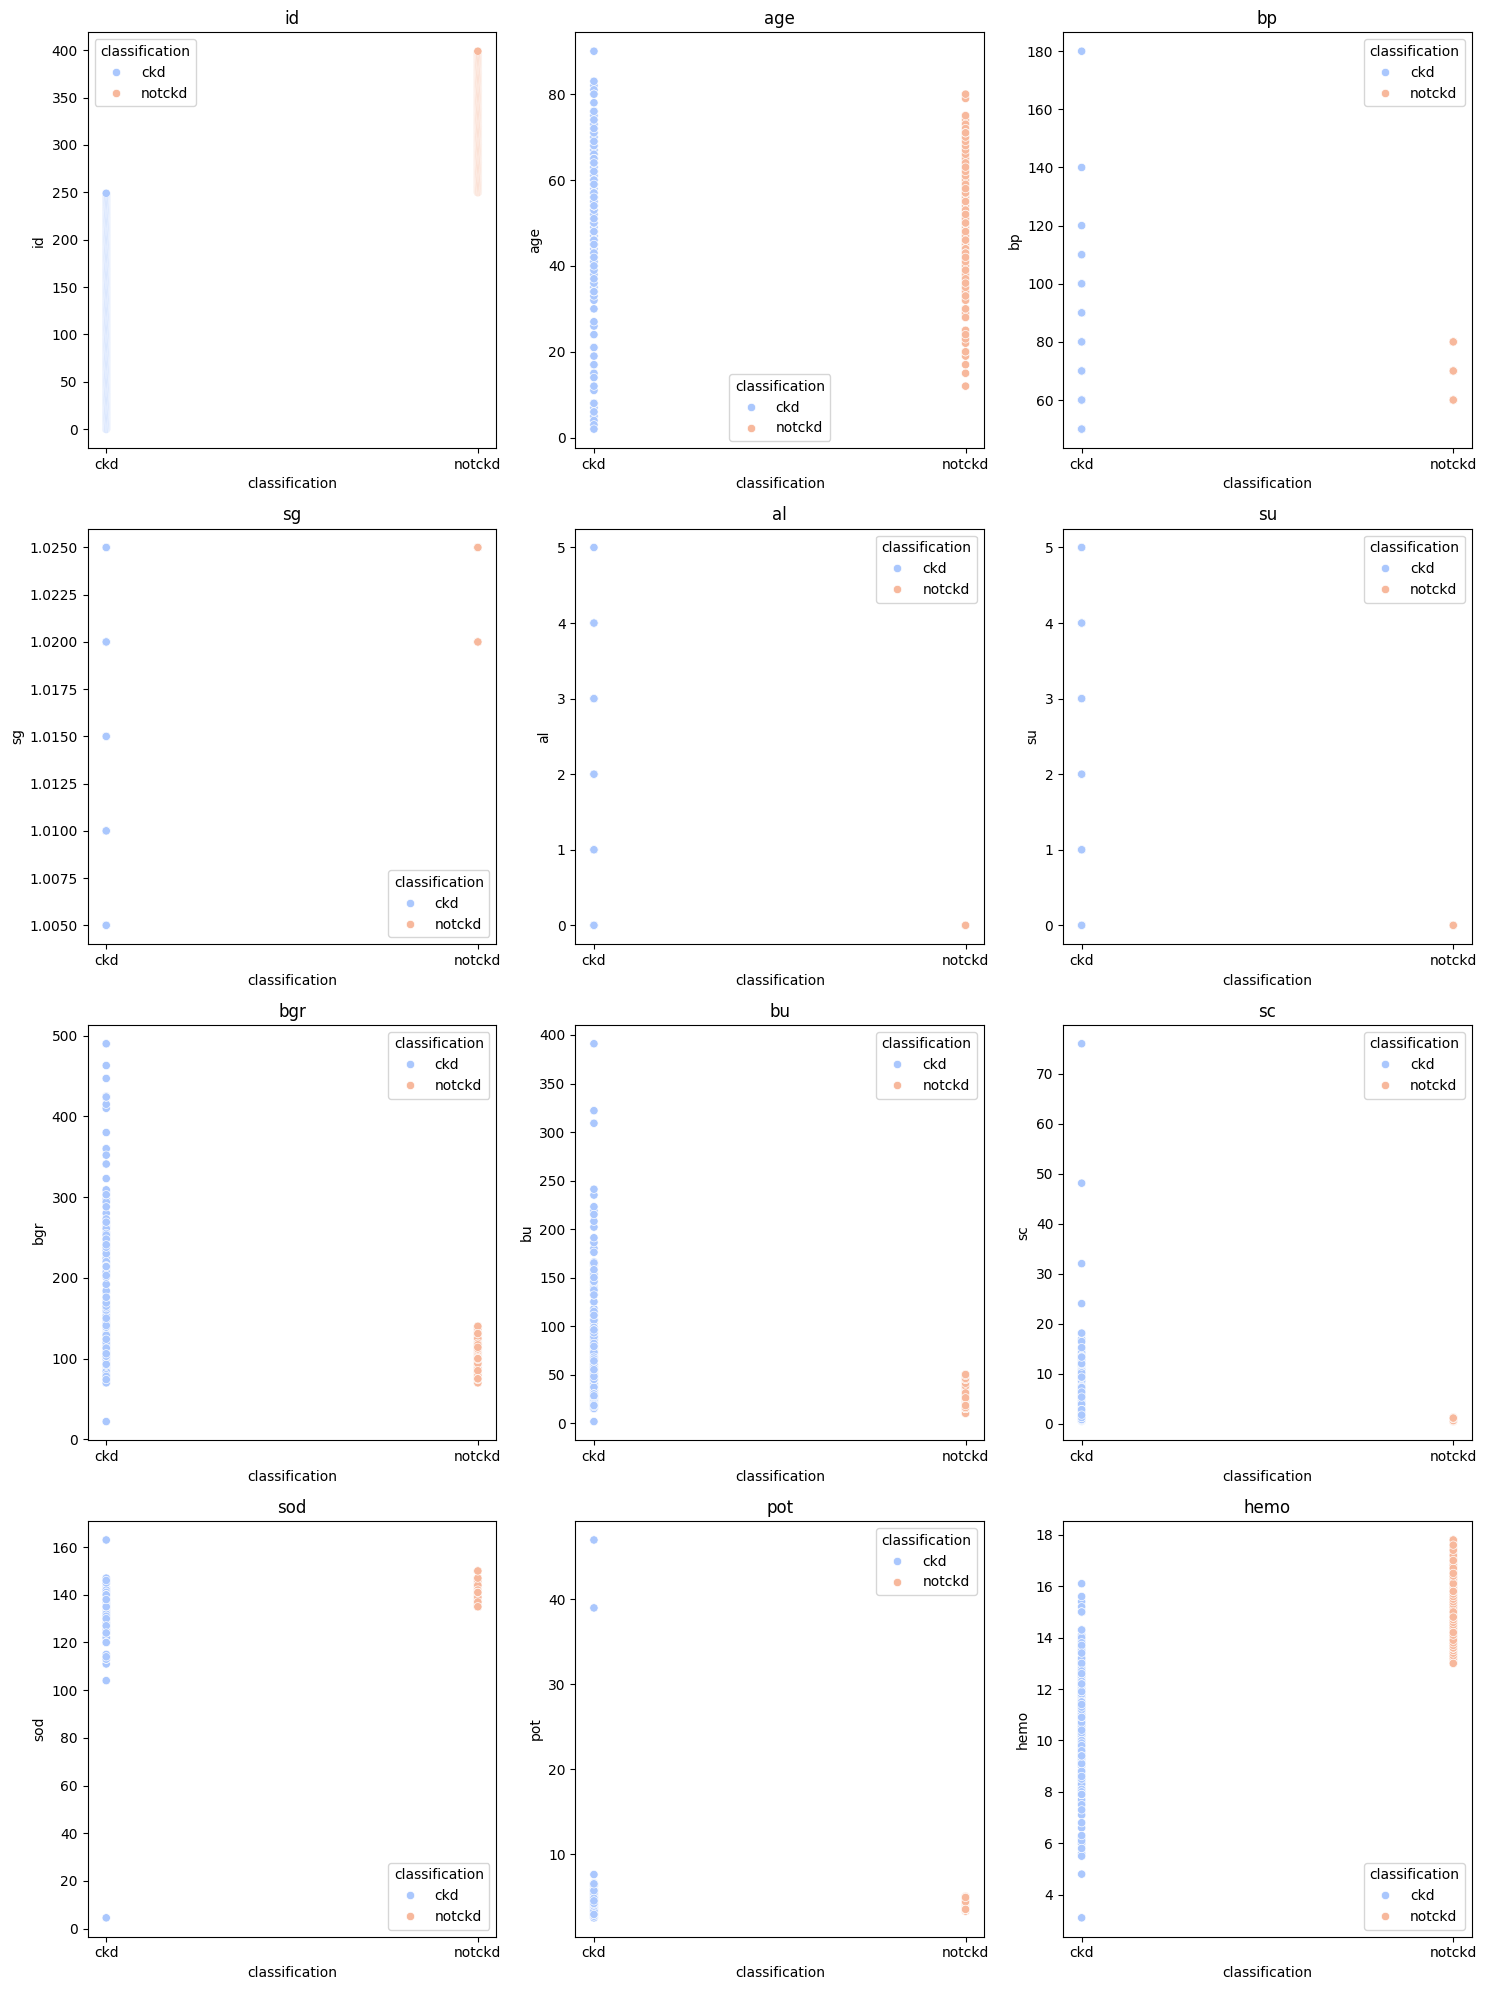

In [ ]:
import math
n_cols = 3  # Number of columns in the subplot grid
n_rows = math.ceil(len(num_cols) / n_cols)  # Automatically determine the required rows

plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on rows

for i, col in enumerate(num_cols, 1):  
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=kidney_df, x="classification", y=col, hue="classification", palette="coolwarm")  
    plt.title(col)  
plt.tight_layout()  
plt.show()

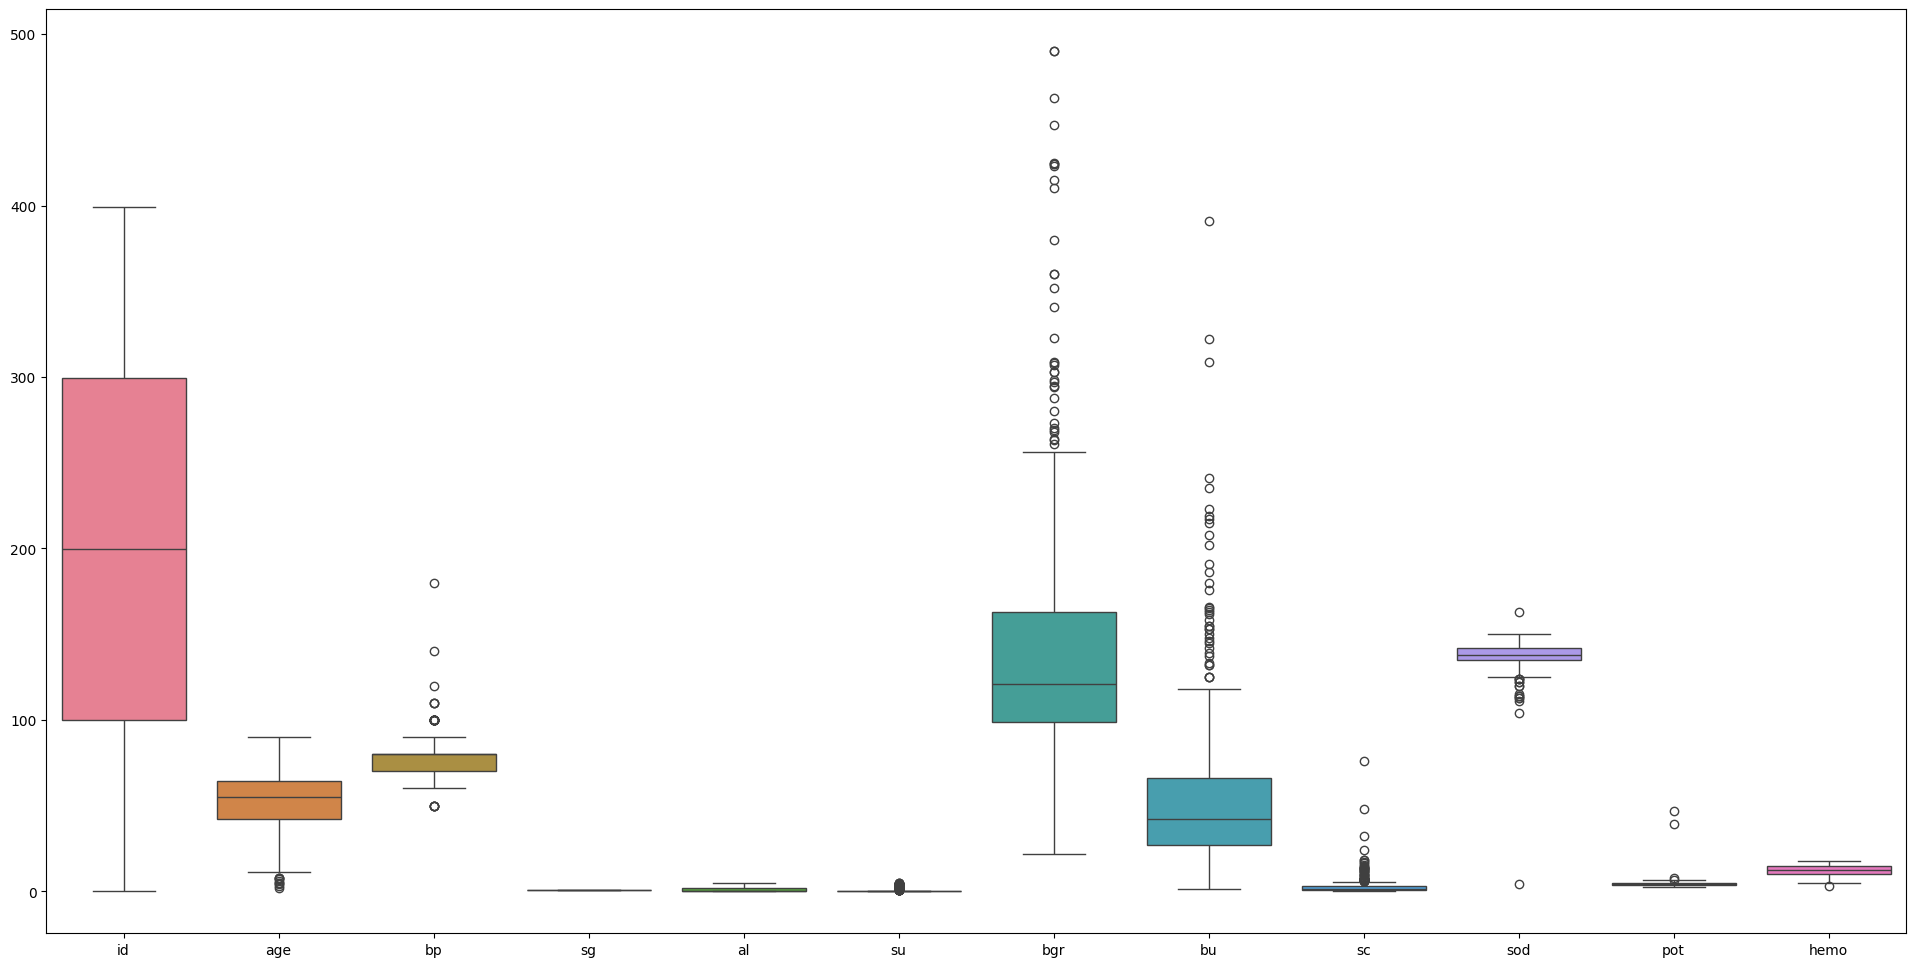

In [ ]:
plt.figure(figsize=(24,12))
sns.boxplot(kidney_df)
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_12956\1702990996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y=col, data=kidney_df, palette="coolwarm")
C:\Users\sures\AppData\Local\Temp\ipykernel_12956\1702990996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y=col, data=kidney_df, palette="coolwarm")
C:\Users\sures\AppData\Local\Temp\ipykernel_12956\1702990996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y=col, data=kidney_df, palette="coolwarm")
C:\Users\sures\AppD

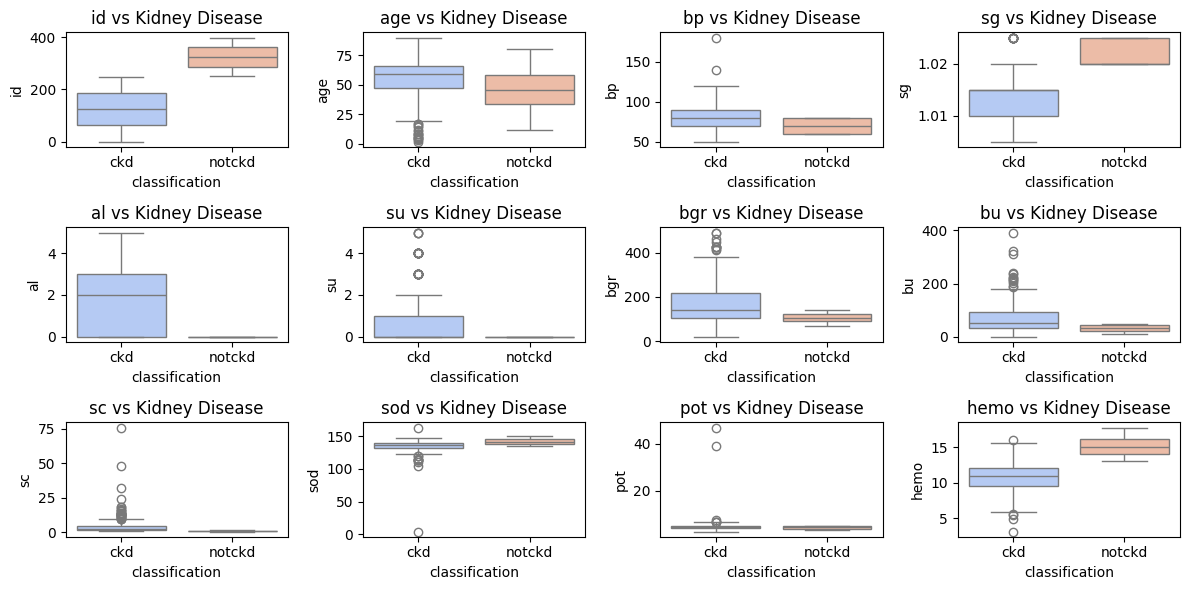

In [ ]:
# Boxplots for Numerical Features by Target
plt.figure(figsize=(12, 6))  
for i, col in enumerate(num_cols, 1):  
    plt.subplot(3, 4, i)  
    sns.boxplot(x="classification", y=col, data=kidney_df, palette="coolwarm")  
    plt.title(f"{col} vs Kidney Disease")  
plt.tight_layout()  
plt.show()  


In [ ]:
kidney_df.duplicated().sum()

np.int64(0)

In [ ]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
#Handing Numerical Columns By imputing median values
num_cols = kidney_df.select_dtypes(include=['int64','float64']).columns
kidney_df[num_cols] = kidney_df[num_cols].fillna(kidney_df[num_cols].median())


In [ ]:
#handling categorical columns by imputing Mode values
categorical_cols = kidney_df.select_dtypes(include=['object']).columns
kidney_df[categorical_cols] = kidney_df[categorical_cols].fillna(kidney_df[categorical_cols].mode().iloc[0])


In [ ]:
kidney_df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
#categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categorical_cols:
    kidney_df[col] = encoder.fit_transform(kidney_df[col])

kidney_df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0


In [ ]:
#numerical columns to standardized column values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in num_cols:
    kidney_df[col] = scaler.fit_transform(kidney_df[[col]])

kidney_df.head(5)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0


In [ ]:
#Feature Scaling

x = kidney_df.drop(columns=['id','classification'])
y = kidney_df['classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train)

          age        bp    sg   al   su  rbc  pc  pcc  ba       bgr  ...  \
152  0.420455  0.153846  0.25  0.0  0.0    1   1    0   0  0.211538  ...   
249  0.613636  0.307692  0.25  0.8  0.2    1   0    1   0  0.329060  ...   
348  0.409091  0.230769  0.75  0.0  0.0    1   1    0   0  0.164530  ...   
218  0.352273  0.307692  0.50  0.0  0.0    1   1    0   0  0.149573  ...   
105  0.715909  0.230769  0.50  0.0  0.0    1   1    0   0  0.198718  ...   
..        ...       ...   ...  ...  ...  ...  ..  ...  ..       ...  ...   
355  0.238636  0.076923  0.75  0.0  0.0    1   1    0   0  0.155983  ...   
177  0.715909  0.230769  0.50  0.4  0.2    1   1    1   0  0.412393  ...   
228  0.659091  0.153846  0.75  0.0  0.0    1   1    0   0  0.217949  ...   
51   0.590909  0.384615  0.50  0.6  0.0    1   1    1   0  0.299145  ...   
95   0.681818  0.307692  0.50  0.2  0.0    1   1    0   0  0.153846  ...   

         hemo  pcv  wc  rc  htn  dm  cad  appet  pe  ane  
152  0.530612   18  87  30  

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model = LogisticRegression()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 1.0
recall score:1.0
f1 score:1.0
roc_auc score:1.0


d:\Multiple Disease Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model = DecisionTreeClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.9583333333333334
recall score:0.92
f1 score:0.9387755102040817
roc_auc score:0.9509090909090908


In [ ]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model_A = RandomForestClassifier(n_estimators=100)
kidney_model_A.fit(x_train,y_train)
y_pred = kidney_model_A.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 1.0
recall score:0.96
f1 score:0.9795918367346939
roc_auc score:0.98


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = BaggingClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")


precision score: 1.0
recall score:0.92
f1 score:0.9583333333333334
roc_auc score:0.96


In [ ]:
#K Nearest Neignbors classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = KNeighborsClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.875
recall score:0.84
f1 score:0.8571428571428571
roc_auc score:0.8927272727272726


In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = SVC()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.7727272727272727
recall score:0.68
f1 score:0.723404255319149
roc_auc score:0.7945454545454546


In [ ]:
df = pd.DataFrame({
    "model" : ["logistic","Decision Tree","Random Forest","Bagging","KNNeighbours","SVC"],
    "precision":[1.0,0.86,0.96,0.9,0.925,0.66],
    "recall":[0.93,1.0,1.0,0.93,0.79,0.68],
    "f1_score":[0.96,0.98,1.0,0.91,0.84,0.67],
    "AUC" : [0.96,0.96,0.99,0.93,0.86,0.74]
})

In [ ]:
df

,model,precision,recall,f1_score,AUC
0,logistic,1.000,0.93,0.96,0.96
1,Decision Tree,0.860,1.00,0.98,0.96
2,Random Forest,0.960,1.00,1.00,0.99
3,Bagging,0.900,0.93,0.91,0.93
4,KNNeighbours,0.925,0.79,0.84,0.86
5,SVC,0.660,0.68,0.67,0.74


In [ ]:
# Random forest Classifier is the best model to predict

In [ ]:
import pickle


with open('Kidney_model.pkl', 'wb') as file:
    pickle.dump(kidney_model_A, file)